<a href="https://colab.research.google.com/github/prasanna-venkatesh-m/iris-binary-classification/blob/main/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
# import kagglehub
# path = kagglehub.dataset_download("himanshunakrani/iris-dataset")
# print("Path to dataset files:", path)

In [4]:
data = pd.read_csv('/content/iris_synthetic_data.csv')
data

,sepal length,sepal width,petal length,petal width,label
0,5.2,3.8,1.5,0.3,Iris-setosa
1,5.3,4.1,1.5,0.1,Iris-setosa
2,4.8,3.1,1.5,0.2,Iris-setosa
3,5.2,3.7,1.5,0.2,Iris-setosa
4,4.9,3.0,1.5,0.3,Iris-setosa
...,...,...,...,...,...
2995,7.2,3.6,6.0,2.5,Iris-virginica
2996,7.3,3.0,6.2,2.1,Iris-virginica
2997,6.9,3.2,5.7,2.3,Iris-virginica
2998,7.5,2.8,6.0,2.0,Iris-virginica


In [6]:
data['label'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
new_data = data[data['label'] != 'Iris-virginica']

In [12]:
new_data

,sepal length,sepal width,petal length,petal width,label
0,5.2,3.8,1.5,0.3,Iris-setosa
1,5.3,4.1,1.5,0.1,Iris-setosa
2,4.8,3.1,1.5,0.2,Iris-setosa
3,5.2,3.7,1.5,0.2,Iris-setosa
4,4.9,3.0,1.5,0.3,Iris-setosa
...,...,...,...,...,...
1995,5.2,2.7,3.9,1.4,Iris-versicolor
1996,5.8,2.8,4.5,1.4,Iris-versicolor
1997,5.9,3.2,4.8,1.7,Iris-versicolor
1998,5.9,3.1,4.3,1.5,Iris-versicolor


In [13]:
new_data['label'].unique()

array(['Iris-setosa', 'Iris-versicolor'], dtype=object)

In [15]:
le = LabelEncoder()
labeled_data = le.fit_transform(new_data['label'])

In [17]:
print(labeled_data.shape)

(2000,)


In [24]:
new_data['Target']=labeled_data
new_data

/tmp/ipython-input-2139784781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Target']=labeled_data


,sepal length,sepal width,petal length,petal width,label,Target
0,5.2,3.8,1.5,0.3,Iris-setosa,0
1,5.3,4.1,1.5,0.1,Iris-setosa,0
2,4.8,3.1,1.5,0.2,Iris-setosa,0
3,5.2,3.7,1.5,0.2,Iris-setosa,0
4,4.9,3.0,1.5,0.3,Iris-setosa,0
...,...,...,...,...,...,...
1995,5.2,2.7,3.9,1.4,Iris-versicolor,1
1996,5.8,2.8,4.5,1.4,Iris-versicolor,1
1997,5.9,3.2,4.8,1.7,Iris-versicolor,1
1998,5.9,3.1,4.3,1.5,Iris-versicolor,1


In [94]:
datas = new_data.drop(columns=['label'], axis=1)
datas

,sepal length,sepal width,petal length,petal width,Target
0,5.2,3.8,1.5,0.3,0
1,5.3,4.1,1.5,0.1,0
2,4.8,3.1,1.5,0.2,0
3,5.2,3.7,1.5,0.2,0
4,4.9,3.0,1.5,0.3,0
...,...,...,...,...,...
1995,5.2,2.7,3.9,1.4,1
1996,5.8,2.8,4.5,1.4,1
1997,5.9,3.2,4.8,1.7,1
1998,5.9,3.1,4.3,1.5,1


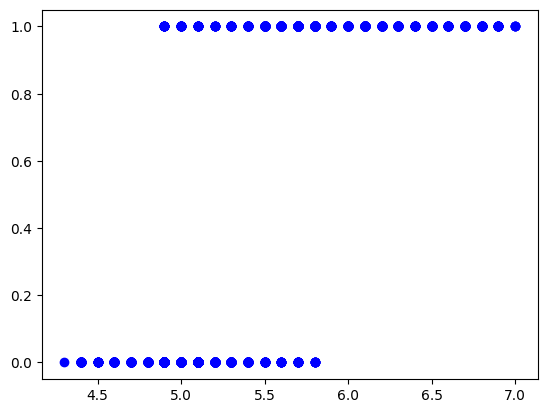

In [95]:
plt.scatter(datas['sepal length'], datas['Target'], c='b')
plt.show()

In [42]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [64]:
# def compute_cost(y,y_pred):
#   y = np.array(y)
#   y_pred = np.array(y_pred)

#   episilon = 1e-15
#   y_pred = np.clip(y_pred, episilon, 1-episilon)
#   cost = -(1 / len(y)) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
#   return cost


def compute_cost(y, y_pred):
    y = np.array(y, dtype=np.float64)
    y_pred = np.array(y_pred, dtype=np.float64)

    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

    cost = -(1 / len(y)) * np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

In [77]:
def gradient_descent(x, y, tmp_w,tmp_b, max_iter=1000, alpha_rate=0.01):
  w = tmp_w
  b = tmp_b
  m = len(x)
  cost_history=[]
  for i in range(max_iter):
    z = np.dot(x, w) + b
    y_pred = sigmoid(z)
    cost = compute_cost(y_pred,y)
    cost_history.append(cost)

    if i % 100 == 0:
      print(f'Iteration {i} cost is {cost}')

    dj_dw = (1 / m) * np.dot(x.T, (y_pred - y))
    dj_db = (1 / m) * np.sum(y_pred - y)

    w = w - (alpha_rate * dj_dw)
    b = b - (alpha_rate * dj_db)

  return w, b, cost_history

In [66]:
X = new_data.drop(columns=['label'], axis=1)
y = new_data['Target']

In [67]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.3)

In [68]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(1400, 5)
(1400,)
(600, 5)
(600,)


In [111]:
tmp_w = np.array([2, 5, 1, 0, 3])
print(tmp_w.shape)

(5,)


In [80]:
w,b, cost_history = gradient_descent(X_train, y_train, tmp_w, 1,max_iter=10000, alpha_rate=0.1)

Iteration 0 cost is 17.392740970277988
Iteration 100 cost is 2.1928662094685167
Iteration 200 cost is 1.0118963149930384
Iteration 300 cost is 0.6592646187707435
Iteration 400 cost is 0.4900975978448326
Iteration 500 cost is 0.39069232310131796
Iteration 600 cost is 0.3252113404628386
Iteration 700 cost is 0.27878320090879943
Iteration 800 cost is 0.24412616865349512
Iteration 900 cost is 0.21725327048552612
Iteration 1000 cost is 0.19579751265506481
Iteration 1100 cost is 0.17826455522778367
Iteration 1200 cost is 0.16366424223371903
Iteration 1300 cost is 0.15131435057485582
Iteration 1400 cost is 0.14072942067900598
Iteration 1500 cost is 0.13155452623558136
Iteration 1600 cost is 0.12352412155819069
Iteration 1700 cost is 0.11643554288286066
Iteration 1800 cost is 0.11013141488566135
Iteration 1900 cost is 0.1044876548430224
Iteration 2000 cost is 0.09940510044083589
Iteration 2100 cost is 0.09480354485416147
Iteration 2200 cost is 0.09061740813625138
Iteration 2300 cost is 0.08679

In [81]:
print(w)
print(b)

[-2.32559104 -0.57383277  3.97573179  1.57397883  4.85804363]
-0.22297760553203427


In [91]:
y_train_pred_sigmoid = sigmoid(np.dot(w, X_train.T)+b)
print(y_train_pred_sigmoid)

[1.60034175e-03 9.99790171e-01 1.02064155e-03 ... 9.99975262e-01
 7.19911111e-05 9.98986700e-01]


In [92]:
y_train_pred = np.zeros(len(y_train_pred_sigmoid))
for i in range(len(y_train_pred_sigmoid)):
  if y_train_pred_sigmoid[i] >= 0.6:
    y_train_pred[i] = 1
  else:
    y_train_pred[i] = 0

In [93]:
y_train_pred

array([0., 1., 0., ..., 1., 0., 1.])

(1400,)
(1400,)
(1400, 5)


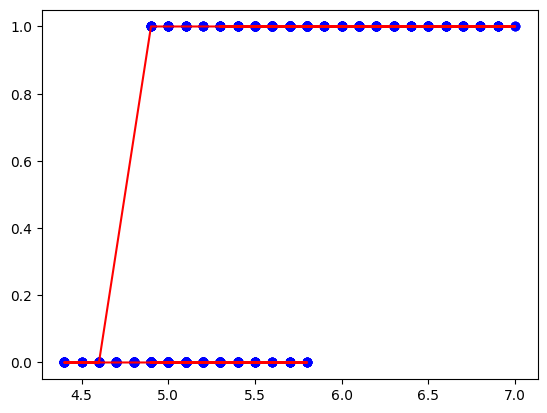

In [104]:
sorted_indexes = y_train_pred.argsort()
X_sorted = X_train.iloc[sorted_indexes]
y_sorted = y_train.iloc[sorted_indexes]
y_test_sorted = pd.Series(y_train_pred)[sorted_indexes]

plt.scatter(X_sorted['sepal length'], y_sorted, c='b')
plt.plot(X_sorted['sepal length'],y_test_sorted, c='r')
plt.show()

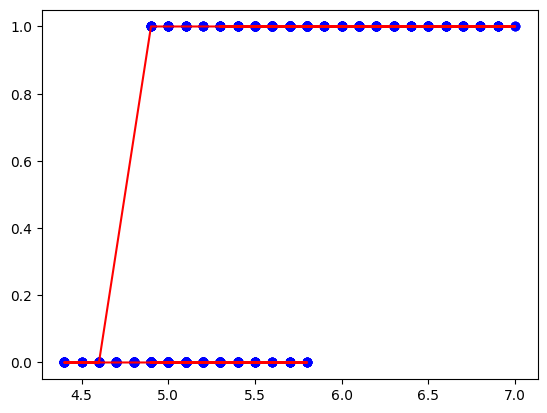

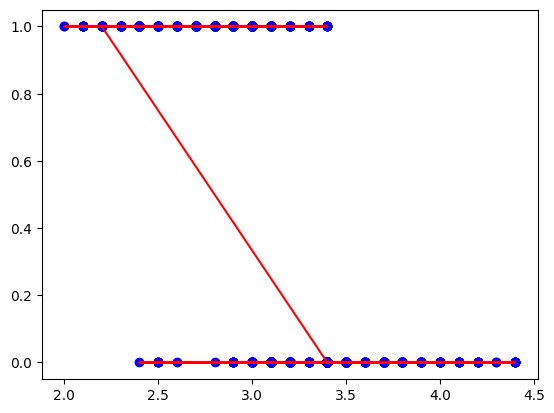

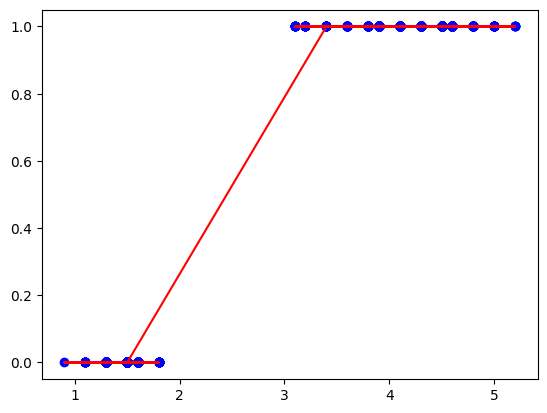

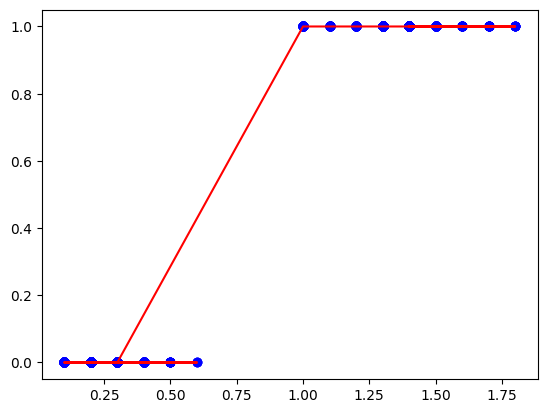

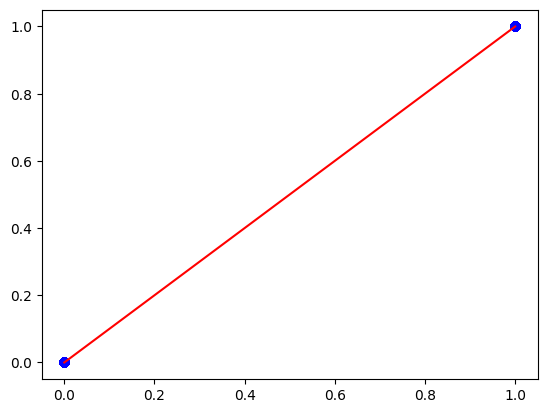

In [106]:
for i in X_train.columns:
  sorted_indexes = y_train_pred.argsort()
  X_sorted = X_train.iloc[sorted_indexes]
  y_sorted = y_train.iloc[sorted_indexes]
  y_test_sorted = pd.Series(y_train_pred)[sorted_indexes]

  plt.scatter(X_sorted[i], y_sorted, c='b')
  plt.plot(X_sorted[i],y_test_sorted, c='r')
  plt.show()

In [108]:
confusion_matrix(y_train, y_train_pred)

array([[705,   0],
       [  0, 695]])

In [110]:
accuracy_score(y_train, y_train_pred)

1.0

In [112]:
y_test_pred_sigmoid = sigmoid(np.dot(w, X_test.T)+b)
print(y_test_pred_sigmoid)

[6.82908802e-04 9.98191855e-01 2.36159590e-04 3.39163528e-04
 9.99863210e-01 4.50925722e-04 9.99638201e-01 8.17239831e-04
 1.34626266e-04 2.26305607e-04 2.26305607e-04 9.99899548e-01
 1.00267501e-03 4.27927026e-04 9.99892686e-01 9.23590893e-04
 9.99651408e-01 9.98823092e-01 9.99684727e-01 3.39163528e-04
 9.98178821e-01 9.99941829e-01 9.99889653e-01 3.98157334e-04
 9.99369954e-01 9.99684727e-01 1.10302423e-03 3.20255147e-04
 6.91289936e-04 1.06694688e-04 4.53189647e-04 9.99081104e-01
 6.91289936e-04 5.53487710e-04 9.99899548e-01 3.36752767e-04
 9.99988278e-01 2.73495855e-04 9.99026477e-01 9.99636231e-01
 5.39908537e-04 1.53365329e-03 9.23590893e-04 9.99965918e-01
 2.26305607e-04 3.15566916e-04 9.99896596e-01 9.99949512e-01
 9.98178821e-01 9.99643497e-01 9.98178821e-01 4.01200133e-04
 2.19063947e-04 6.91289936e-04 3.45079203e-04 1.51817115e-03
 9.99622449e-01 3.07804494e-04 1.34626266e-04 9.99718901e-01
 9.99899548e-01 9.98984546e-01 9.99622449e-01 8.18515484e-05
 9.99899548e-01 9.999009

In [113]:
y_test_pred = np.zeros(len(y_test_pred_sigmoid))
for i in range(len(y_test_pred_sigmoid)):
  if y_test_pred_sigmoid[i] >= 0.6:
    y_test_pred[i] = 1
  else:
    y_test_pred[i] = 0

In [114]:
y_test_pred

array([0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 1.

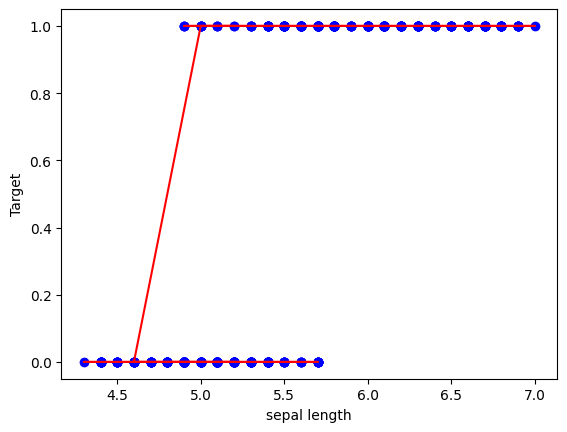

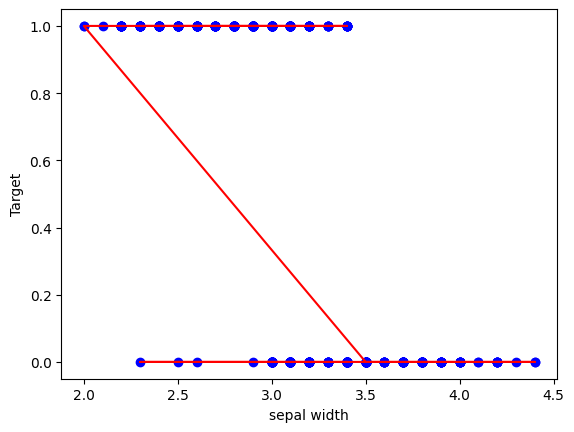

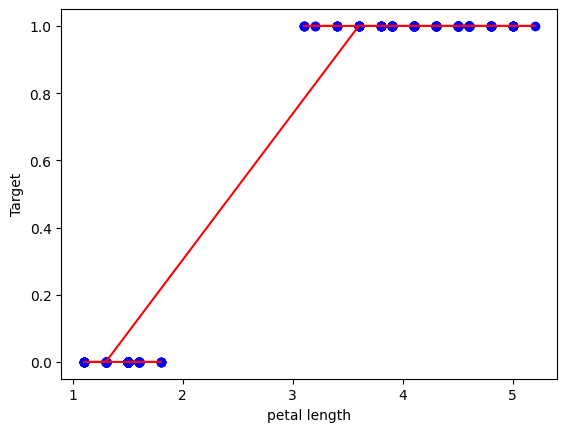

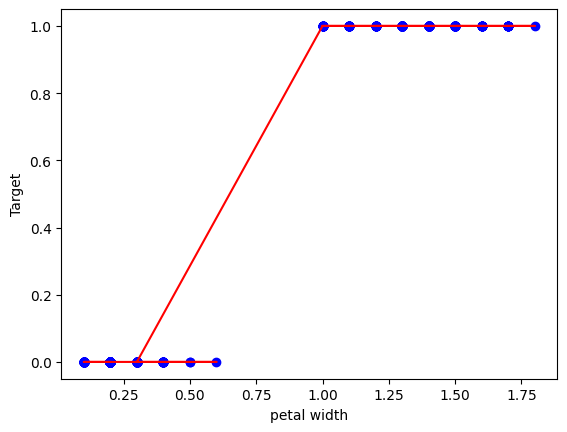

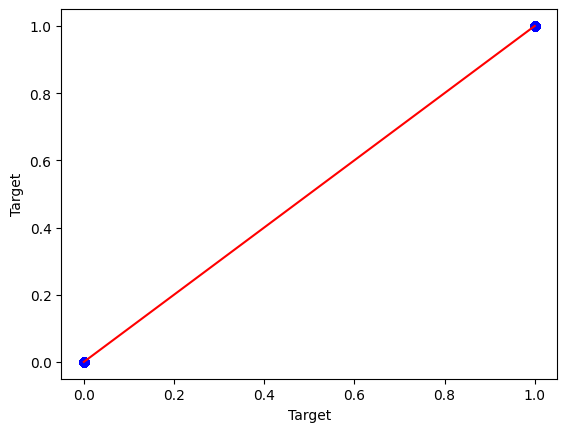

In [116]:
for i in X_test.columns:
  sorted_indexes = y_test_pred.argsort()
  X_sorted = X_test.iloc[sorted_indexes]
  y_sorted = y_test.iloc[sorted_indexes]
  y_test_sorted = pd.Series(y_test_pred)[sorted_indexes]

  plt.scatter(X_sorted[i], y_sorted, c='b')
  plt.plot(X_sorted[i],y_test_sorted, c='r')
  plt.xlabel(i)
  plt.ylabel('Target')
  plt.show()

In [117]:
accuracy_score(y_test, y_test_pred)

1.0

In [118]:
confusion_matrix(y_test, y_test_pred)

array([[295,   0],
       [  0, 305]])